**Get Data From Here** :- <a href="https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews?select=IMDB+Dataset.csv">Get Data</a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pickle

## Import Data

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/IMDB Dataset.csv')
df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [ ]:
print("Summary statistics of numerical features : \n", df.describe())

print("=======================================================================")

print("\nTotal number of reviews: ",len(df))

print("=======================================================================")

print("\nTotal number of Sentiments: ", len(list(set(df['sentiment']))))

df['sentiment'] = np.where(df['sentiment'] == "positive", 1, 0)
df

Summary statistics of numerical features : 
                                                    review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  negative
freq                                                    5     25000

Total number of reviews:  50000

Total number of Sentiments:  2


,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


# Data Visualization

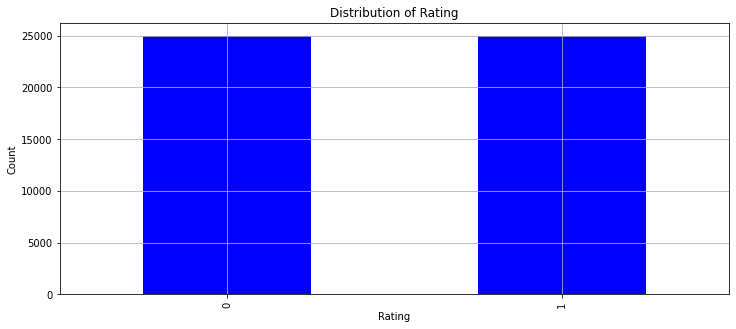

In [ ]:
plt.figure(figsize=(12,5))
# sns.countplot(df['Rating'])
df['sentiment'].value_counts().sort_index().plot(kind='bar',color = 'blue')
plt.title('Distribution of Rating')
plt.grid()
plt.xlabel('Rating')
plt.ylabel('Count')
ax = plt.axes()
ax.set_facecolor("white")

# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], \
                                                    test_size=0.2, random_state=0)

print('Load %d training examples and %d validation examples. \n' %(X_train.shape[0],X_test.shape[0]))
print('Show a review in the training set : \n', X_train.iloc[10])
X_train,y_train

Load 40000 training examples and 10000 validation examples. 

Show a review in the training set : 
 Add pure humor + quick and unique sentences + sex + unfaith sex! + love + lies + dark deadly thoughts + secret plans + fun + black humor + sex!.. again! + black dresses! (needed for the unlimited funerals!) = Eglimata!!! Or in English, Crimes!! Our Heroes are two married couples, their relatives, their friends and neighbors. There is Soso and Alekos and Flora and Achilleas, two married couples who have everything but not real love! Flora is the mistress of Alekos, and when Soso finds what's going on, she is planning with her best friend Pepi to kill Alekos and look like an accident! Many plans were made but everyone else dies except Alekos! Achilleas find's out that he has a sister who is a Hooker and tries to put her in the right road..Korina is a temptation to mens but her tries to get married all goes wrong, since when they learn her past, freaks and leave and she ends up marrying a r

(20330    That's about the only redeeming quality in a m...
 17532    Even if I had not read Anne Rice's "Queen of t...
 45819    I sort of liked this Columbo movie its atmosph...
 34807    "Zabriskie Point" (1970): This was especially ...
 31888    Quite one of the worst films I have ever seen....
                                ...                        
 21243    I did not set very high expectations for this ...
 45891    THE BLOB is a great horror movie, not merely b...
 42613    After too many years of waiting, Anne Rivers S...
 43567    I am a massive fan of the LoG. I thought the f...
 2732     AG was an excellent presentation of drama, sus...
 Name: review, Length: 40000, dtype: object, 20330    0
 17532    0
 45819    1
 34807    1
 31888    0
         ..
 21243    1
 45891    1
 42613    1
 43567    0
 2732     1
 Name: sentiment, Length: 40000, dtype: int64)

# Bag of Words
<br>

**Step 1 : Preprocess raw reviews to cleaned reviews**

**Step 2 : Create BoW using CountVectorizer / Tfidfvectorizer in sklearn**

**Step 3 : Transform review text to numerical representations (feature vectors)**

**Step 4 : Fit feature vectors to supervised learning algorithm (eg. Naive Bayes, Logistic regression, etc.)**

**Step 5 : Improve the model performance by GridSearch**

# Text Preprocessing
<br>

**Step 1 : remove html tags using BeautifulSoup**

**Step 2 : remove non-character such as digits and symbols**

**Step 3 : convert to lower case**

**Step 4 : remove stop words such as "the" and "and" if needed**

**Step 5 : convert to root words by stemming if needed**

In [ ]:
def cleanText(raw_text, remove_stopwords=False, stemming=False, split_text=False, \
             ):
    '''
    Convert a raw review to a cleaned review
    '''
    text = BeautifulSoup(raw_text, 'html.parser').get_text()
    letters_only = re.sub("[^a-zA-Z]", " ", text)
    words = letters_only.lower().split() 
    
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
        
    if stemming==True:

        stemmer = SnowballStemmer('english') 
        words = [stemmer.stem(w) for w in words]
        
    if split_text==True:
        return (words)
    
    return( " ".join(words))

In [ ]:
import re
import nltk
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk import sent_tokenize, word_tokenize, pos_tag
from bs4 import BeautifulSoup 
import logging
from wordcloud import WordCloud
from gensim.models import word2vec
from gensim.models import Word2Vec
from gensim.models.keyedvectors import KeyedVectors

X_train_cleaned = []
X_test_cleaned = []

for d in X_train:
    X_train_cleaned.append(cleanText(d))
print('Show a cleaned review in the training set : \n',  X_train_cleaned[10])
    
for d in X_test:
    X_test_cleaned.append(cleanText(d))

Show a cleaned review in the training set : 
 add pure humor quick and unique sentences sex unfaith sex love lies dark deadly thoughts secret plans fun black humor sex again black dresses needed for the unlimited funerals eglimata or in english crimes our heroes are two married couples their relatives their friends and neighbors there is soso and alekos and flora and achilleas two married couples who have everything but not real love flora is the mistress of alekos and when soso finds what s going on she is planning with her best friend pepi to kill alekos and look like an accident many plans were made but everyone else dies except alekos achilleas find s out that he has a sister who is a hooker and tries to put her in the right road korina is a temptation to mens but her tries to get married all goes wrong since when they learn her past freaks and leave and she ends up marrying a rich farm man as for the other roles they are like they are from cartoons grandpa aristidis which fakes th

## CountVectorizer with Multinomial Naive Bayes (Benchmark Model)




In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
countVect = CountVectorizer() 
X_train_countVect = countVect.fit_transform(X_train_cleaned)
print("Number of features : %d \n" %len(countVect.get_feature_names())) #6378 
print("Show some feature names : \n", countVect.get_feature_names()[::1000])


# Train MultinomialNB classifier
mnb = MultinomialNB()
mnb.fit(X_train_countVect, y_train)

Number of features : 92259 

Show some feature names : 
 ['aa', 'ads', 'allegorical', 'ankh', 'army', 'austrians', 'bankable', 'behalf', 'biplanes', 'bolliwood', 'brennaman', 'burnstyn', 'carabiners', 'cermonies', 'choco', 'clothers', 'complicates', 'convientantly', 'creds', 'dads', 'deeriving', 'desperado', 'discharges', 'dominick', 'dulhan', 'ekes', 'entailed', 'ewen', 'falsetto', 'fieriest', 'flushes', 'frickin', 'garvin', 'gladiator', 'granting', 'gutwrenching', 'hasta', 'heyy', 'hopper', 'icp', 'indefensible', 'interiorized', 'jailbreak', 'judgments', 'khakee', 'kristevian', 'laundry', 'likable', 'lousy', 'maids', 'martyn', 'medicines', 'milbank', 'moltisanti', 'mugged', 'naxalites', 'nolonger', 'oedipial', 'otherness', 'pandora', 'pegged', 'physics', 'pointillistic', 'preeners', 'provisos', 'qwak', 'rebarba', 'remarriage', 'rewords', 'roomful', 'sales', 'schlegel', 'senate', 'shikakai', 'sinned', 'snapper', 'sparklingly', 'standards', 'streetlights', 'superdupercharged', 'tableto

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
pickle.dump(countVect,open('countVect_imdb.pkl','wb'))

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score,roc_auc_score
def modelEvaluation(predictions):
    '''
    Print model evaluation to predicted result 
    '''
    print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test, predictions)))
    print("\nAUC score : {:.4f}".format(roc_auc_score(y_test, predictions)))
    print("\nClassification report : \n", metrics.classification_report(y_test, predictions))
    print("\nConfusion Matrix : \n", metrics.confusion_matrix(y_test, predictions))

In [ ]:
predictions = mnb.predict(countVect.transform(X_test_cleaned))
modelEvaluation(predictions)


Accuracy on validation set: 0.8450

AUC score : 0.8448

Classification report : 
               precision    recall  f1-score   support

           0       0.83      0.88      0.85      5035
           1       0.87      0.81      0.84      4965

    accuracy                           0.84     10000
   macro avg       0.85      0.84      0.84     10000
weighted avg       0.85      0.84      0.84     10000


Confusion Matrix : 
 [[4419  616]
 [ 934 4031]]


In [ ]:
import pickle
pickle.dump(mnb,open('Naive_Bayes_model_imdb.pkl','wb'))

# TfidfVectorizer with Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
tfidf = TfidfVectorizer(min_df=5) #minimum document frequency of 5
X_train_tfidf = tfidf.fit_transform(X_train)
print("Number of features : %d \n" %len(tfidf.get_feature_names())) #1722
print("Show some feature names : \n", tfidf.get_feature_names()[::1000])

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_tfidf, y_train)

Number of features : 33686 

Show some feature names : 
 ['00', 'aishwarya', 'assigns', 'bengal', 'brining', 'challenge', 'commence', 'creatively', 'depend', 'doped', 'enforces', 'fastest', 'freleng', 'grandparents', 'heralded', 'implementation', 'izzy', 'lain', 'luke', 'mencia', 'mutual', 'onwards', 'penultimate', 'predecessors', 'ramón', 'retelling', 'saving', 'showcasing', 'spanish', 'submachine', 'teutonic', 'trying', 'vanished', 'wig']


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
feature_names = np.array(tfidf.get_feature_names())
sorted_coef_index = lr.coef_[0].argsort()
print('\nTop 10 features with smallest coefficients :\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Top 10 features with largest coefficients : \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))


Top 10 features with smallest coefficients :
['worst' 'bad' 'waste' 'awful' 'boring' 'terrible' 'poor' 'nothing' 'dull'
 'horrible']

Top 10 features with largest coefficients : 
['great' 'excellent' 'best' 'perfect' 'wonderful' 'amazing' 'loved'
 'today' 'fun' 'favorite']


In [ ]:
predictions = lr.predict(tfidf.transform(X_test_cleaned))
modelEvaluation(predictions)


Accuracy on validation set: 0.8906

AUC score : 0.8907

Classification report : 
               precision    recall  f1-score   support

           0       0.90      0.88      0.89      5035
           1       0.88      0.90      0.89      4965

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000


Confusion Matrix : 
 [[4426  609]
 [ 485 4480]]


In [ ]:
from sklearn.model_selection import  GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.pipeline import Pipeline
estimators = [("tfidf", TfidfVectorizer()), ("lr", LogisticRegression())]
model = Pipeline(estimators)


params = {"lr__C":[0.1, 1, 10], 
          "tfidf__min_df": [1, 3], 
          "tfidf__max_features": [1000, None], 
          "tfidf__ngram_range": [(1,1), (1,2)], 
          "tfidf__stop_words": [None, "english"]} 

grid = GridSearchCV(estimator=model, param_grid=params, scoring="accuracy", n_jobs=-1)
grid.fit(X_train_cleaned, y_train)
print("The best paramenter set is : \n", grid.best_params_)


# Evaluate on the validaton set
predictions = grid.predict(X_test_cleaned)
modelEvaluation(predictions)

The best paramenter set is : 
 {'lr__C': 10, 'tfidf__max_features': None, 'tfidf__min_df': 3, 'tfidf__ngram_range': (1, 2), 'tfidf__stop_words': None}

Accuracy on validation set: 0.9090

AUC score : 0.9090

Classification report : 
               precision    recall  f1-score   support

           0       0.91      0.91      0.91      5035
           1       0.91      0.91      0.91      4965

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000


Confusion Matrix : 
 [[4563  472]
 [ 438 4527]]


# Word2Vec
<br>

**Step 1 : Parse review text to sentences (Word2Vec model takes a list of sentences as inputs)**

**Step 2 : Create volcabulary list using Word2Vec model.**

**Step 3 : Transform each review into numerical representation by computing average feature vectors of words therein.**

**Step 4 : Fit the average feature vectors to Random Forest Classifier.**

In [ ]:
import nltk
nltk.download('punkt')
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

def parseSent(review, tokenizer, remove_stopwords=False):

    raw_sentences = tokenizer.tokenize(review.strip())
    sentences = []
    for raw_sentence in raw_sentences:
        if len(raw_sentence) > 0:
            sentences.append(cleanText(raw_sentence, remove_stopwords, split_text=True))
    return sentences


# Parse each review in the training set into sentences
sentences = []
for review in X_train_cleaned:
    sentences += parseSent(review, tokenizer,remove_stopwords=False)
    
print('%d parsed sentence in the training set\n'  %len(sentences))
print('Show a parsed sentence in the training set : \n',  sentences[10])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
40000 parsed sentence in the training set

Show a parsed sentence in the training set : 
 ['add', 'pure', 'humor', 'quick', 'and', 'unique', 'sentences', 'sex', 'unfaith', 'sex', 'love', 'lies', 'dark', 'deadly', 'thoughts', 'secret', 'plans', 'fun', 'black', 'humor', 'sex', 'again', 'black', 'dresses', 'needed', 'for', 'the', 'unlimited', 'funerals', 'eglimata', 'or', 'in', 'english', 'crimes', 'our', 'heroes', 'are', 'two', 'married', 'couples', 'their', 'relatives', 'their', 'friends', 'and', 'neighbors', 'there', 'is', 'soso', 'and', 'alekos', 'and', 'flora', 'and', 'achilleas', 'two', 'married', 'couples', 'who', 'have', 'everything', 'but', 'not', 'real', 'love', 'flora', 'is', 'the', 'mistress', 'of', 'alekos', 'and', 'when', 'soso', 'finds', 'what', 's', 'going', 'on', 'she', 'is', 'planning', 'with', 'her', 'best', 'friend', 'pepi', 'to', 'kill', 'alekos', 'and', 'look', '

## Creating Volcabulary List using Word2Vec Model

In [ ]:
from wordcloud import WordCloud
from gensim.models import word2vec
from gensim.models.keyedvectors import KeyedVectors
num_features = 300  #embedding dimension                     
min_word_count = 10                
num_workers = 4       
context = 10                                                                                          
downsampling = 1e-3 

print("Training Word2Vec model ...\n")
w2v = Word2Vec(sentences, workers=num_workers, size=num_features, min_count = min_word_count,\
                 window = context, sample = downsampling)
w2v.init_sims(replace=True)
w2v.save("w2v_300features_10minwordcounts_10context") #save trained word2vec model

print("Number of words in the vocabulary list : %d \n" %len(w2v.wv.index2word)) #4016 
print("Show first 10 words in the vocalbulary list  vocabulary list: \n", w2v.wv.index2word[0:10])

Training Word2Vec model ...

Number of words in the vocabulary list : 25087 

Show first 10 words in the vocalbulary list  vocabulary list: 
 ['the', 'and', 'a', 'of', 'to', 'is', 'it', 'in', 'i', 'this']


## Averaging Feature Vectors

In [ ]:
def makeFeatureVec(review, model, num_features):
    '''
    Transform a review to a feature vector by averaging feature vectors of words 
    appeared in that review and in the volcabulary list created
    '''
    featureVec = np.zeros((num_features,),dtype="float32")
    nwords = 0.
    index2word_set = set(model.wv.index2word) #index2word is the volcabulary list of the Word2Vec model
    isZeroVec = True
    for word in review:
        if word in index2word_set: 
            nwords = nwords + 1.
            featureVec = np.add(featureVec, model[word])
            isZeroVec = False
    if isZeroVec == False:
        featureVec = np.divide(featureVec, nwords)
    return featureVec

In [ ]:
def getAvgFeatureVecs(reviews, model, num_features):
    '''
    Transform all reviews to feature vectors using makeFeatureVec()
    '''
    counter = 0
    reviewFeatureVecs = np.zeros((len(reviews),num_features),dtype="float32")
    for review in reviews:
        reviewFeatureVecs[counter] = makeFeatureVec(review, model,num_features)
        counter = counter + 1
    return reviewFeatureVecs

In [ ]:
nltk.download('stopwords')
X_train_cleaned = []
for review in X_train:
    X_train_cleaned.append(cleanText(review, remove_stopwords=True, split_text=True))
trainVector = getAvgFeatureVecs(X_train_cleaned, w2v, num_features)
print("Training set : %d feature vectors with %d dimensions" %trainVector.shape)


# Get feature vectors for validation set
X_test_cleaned = []
for review in X_test:
    X_test_cleaned.append(cleanText(review, remove_stopwords=True, split_text=True))
testVector = getAvgFeatureVecs(X_test_cleaned, w2v, num_features)
print("Validation set : %d feature vectors with %d dimensions" %testVector.shape)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
Training set : 40000 feature vectors with 300 dimensions
Validation set : 10000 feature vectors with 300 dimensions


# Random Forest Classifer

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(trainVector, y_train)
predictions = rf.predict(testVector)
modelEvaluation(predictions)


Accuracy on validation set: 0.8450

AUC score : 0.8451

Classification report : 
               precision    recall  f1-score   support

           0       0.86      0.83      0.84      5035
           1       0.83      0.86      0.85      4965

    accuracy                           0.84     10000
   macro avg       0.85      0.85      0.84     10000
weighted avg       0.85      0.84      0.84     10000


Confusion Matrix : 
 [[4164  871]
 [ 679 4286]]


## LSTM
<br>

**Step 1 : Prepare X_train and X_test to 2D tensor.**
    
**Step 2 : Train a simple LSTM (embeddign layer => LSTM layer => dense layer).**
    
**Step 3 : Compile and fit the model using log loss function and ADAM optimizer.**

In [ ]:
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Lambda
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM, SimpleRNN, GRU
from keras.preprocessing.text import Tokenizer
from collections import defaultdict
from keras.layers.convolutional import Convolution1D
from keras import backend as K
from keras.layers.embeddings import Embedding

In [ ]:
top_words = 40000 
maxlen = 200 
batch_size = 62
nb_classes = 4
nb_epoch = 6


# Vectorize X_train and X_test to 2D tensor
tokenizer = Tokenizer(nb_words=top_words) #only consider top 20000 words in the corpse
tokenizer.fit_on_texts(X_train)
# tokenizer.word_index #access word-to-index dictionary of trained tokenizer

sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

X_train_seq = sequence.pad_sequences(sequences_train, maxlen=maxlen)
X_test_seq = sequence.pad_sequences(sequences_test, maxlen=maxlen)


# one-hot encoding of y_train and y_test
y_train_seq = np_utils.to_categorical(y_train, nb_classes)
y_test_seq = np_utils.to_categorical(y_test, nb_classes)

print('X_train shape:', X_train_seq.shape)
print("========================================")
print('X_test shape:', X_test_seq.shape)
print("========================================")
print('y_train shape:', y_train_seq.shape)
print("========================================")
print('y_test shape:', y_test_seq.shape)
print("========================================")

X_train shape: (40000, 200)
X_test shape: (10000, 200)
y_train shape: (40000, 4)
y_test shape: (10000, 4)


In [ ]:
model1 = Sequential()
model1.add(Embedding(top_words, 128))
model1.add(LSTM(128))
model1.add(Dropout(0.2)) 
model1.add(Dense(nb_classes))
model1.add(Activation('softmax'))
model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 128)         5120000   
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 4)                 516       
_________________________________________________________________
activation (Activation)      (None, 4)                 0         
Total params: 5,252,100
Trainable params: 5,252,100
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model1.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model1.fit(X_train_seq, y_train_seq, batch_size=batch_size, epochs=nb_epoch, verbose=1)

# Model evluation
score = model1.evaluate(X_test_seq, y_test_seq, batch_size=batch_size)
print('Test loss : {:.4f}'.format(score[0]))
print('Test accuracy : {:.4f}'.format(score[1]))

Epoch 1/6
646/646 [==============================] - 78s 69ms/step - loss: 0.3367 - accuracy: 0.6167
Epoch 2/6
646/646 [==============================] - 45s 70ms/step - loss: 0.1248 - accuracy: 0.9009
Epoch 3/6
646/646 [==============================] - 45s 69ms/step - loss: 0.0705 - accuracy: 0.9503
Epoch 4/6
646/646 [==============================] - 45s 69ms/step - loss: 0.0416 - accuracy: 0.9741
Epoch 5/6
646/646 [==============================] - 45s 69ms/step - loss: 0.0247 - accuracy: 0.9858
Epoch 6/6
162/162 [==============================] - 2s 8ms/step - loss: 0.2219 - accuracy: 0.8793
Test loss : 0.2219
Test accuracy : 0.8793


In [ ]:
len(X_train_seq),len(y_train_seq)

(40000, 40000)

## LSTM with Word2Vec Embedding

In [ ]:
w2v = Word2Vec.load("w2v_300features_10minwordcounts_10context")

embedding_matrix = w2v.wv.syn0 
print("Shape of embedding matrix : ", embedding_matrix.shape)

Shape of embedding matrix :  (25087, 300)


In [ ]:
top_words = embedding_matrix.shape[0] #4016 
maxlen = 300 
batch_size = 62
nb_classes = 4
nb_epoch = 7


# Vectorize X_train and X_test to 2D tensor
tokenizer = Tokenizer(nb_words=top_words) #only consider top 20000 words in the corpse
tokenizer.fit_on_texts(X_train)
# tokenizer.word_index #access word-to-index dictionary of trained tokenizer

sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

X_train_seq1 = sequence.pad_sequences(sequences_train, maxlen=maxlen)
X_test_seq1 = sequence.pad_sequences(sequences_test, maxlen=maxlen)


# one-hot encoding of y_train and y_test
y_train_seq1 = np_utils.to_categorical(y_train, nb_classes)
y_test_seq1 = np_utils.to_categorical(y_test, nb_classes)

print('X_train shape:', X_train_seq1.shape)
print("========================================")
print('X_test shape:', X_test_seq1.shape)
print("========================================")
print('y_train shape:', y_train_seq1.shape)
print("========================================")
print('y_test shape:', y_test_seq1.shape)
print("========================================")

X_train shape: (40000, 300)
X_test shape: (10000, 300)
y_train shape: (40000, 4)
y_test shape: (10000, 4)


In [ ]:
len(X_train_seq1),len(y_train_seq1)

(40000, 40000)

In [ ]:
embedding_layer = Embedding(embedding_matrix.shape[0], #4016
                            embedding_matrix.shape[1], #300
                            weights=[embedding_matrix])

model2 = Sequential()
model2.add(embedding_layer)
model2.add(LSTM(128))
model2.add(Dropout(0.2)) 
model2.add(Dense(nb_classes))
model2.add(Activation('softmax'))
model2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 300)         7526100   
_________________________________________________________________
lstm_4 (LSTM)                (None, 128)               219648    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 516       
_________________________________________________________________
activation_1 (Activation)    (None, 4)                 0         
Total params: 7,746,264
Trainable params: 7,746,264
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model2.fit(X_train_seq1, y_train_seq1, batch_size=batch_size, epochs=nb_epoch, verbose=1)

# Model evaluation
score = model2.evaluate(X_test_seq1, y_test_seq1, batch_size=batch_size)
print('Test loss : {:.4f}'.format(score[0]))
print('Test accuracy : {:.4f}'.format(score[1]))

Epoch 1/7
646/646 [==============================] - 74s 112ms/step - loss: 0.3369 - accuracy: 0.6155
Epoch 2/7
646/646 [==============================] - 72s 112ms/step - loss: 0.1525 - accuracy: 0.8808
Epoch 3/7
646/646 [==============================] - 72s 112ms/step - loss: 0.0848 - accuracy: 0.9383
Epoch 4/7
646/646 [==============================] - 72s 111ms/step - loss: 0.0465 - accuracy: 0.9702
Epoch 5/7
646/646 [==============================] - 72s 111ms/step - loss: 0.0285 - accuracy: 0.9836
Epoch 6/7
646/646 [==============================] - 72s 111ms/step - loss: 0.0159 - accuracy: 0.9919
Epoch 7/7
162/162 [==============================] - 3s 14ms/step - loss: 0.2631 - accuracy: 0.8785
Test loss : 0.2631
Test accuracy : 0.8785
